In [2]:
#Packages
import pandas as pd
import seaborn as sns
import sklearn as skl
import datetime as dt
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [629]:
#Variables
startDate = '2010/07/01'
endDate = '2021/07/01'
monthsOut = 12

#make sure to enter your path
excelOutputFolder = r'C:\Users\adamd\Desktop\Hobbies and Things\PandasOutputExtracts\\'

colCng = {
    "DGS1MO": "10YearTreasury",
    "CPIAUCSL": "CPI",
    "PPIACO": "PPI",
    "T10YIE": "Inflation",
    "VIXCLS":"Volatility",
    "UNRATE":"Unemployement Rate", 
    "IMPGSC1" : "Real Imports",
    "NETEXC" : "Real Exports"
}

In [630]:
#Script for predictive

#pull Dependent Variables from Yahoo Finance
dfDa = data.DataReader(['AAPL','TSLA','SPY'], 'yahoo', start=startDate, end=endDate)
dfDa = dfDa['Adj Close']
dfDa = dfDa.reset_index()
dfDa
dfDa['month'] = dfDa['Date'].dt.month
dfDa['year'] = dfDa['Date'].dt.year
dfDa['month and year'] = pd.to_datetime(dfDa['month'].astype(str) + "/" + dfDa['year'].astype(str))
dfDa = dfDa.drop(['month', 'year'], axis=1)
dfDa = dfDa.groupby(['month and year']).mean()
dfDa = dfDa.reset_index()
dfDa['month and year pred'] = dfDa['month and year']  - pd.DateOffset(months=monthsOut)
dfDa

#pull Independent Variables from FRED
dfCa = data.DataReader(['DGS1MO','CPIAUCSL','T10YIE','VIXCLS','UNRATE','GDP','PPIACO','IMPGSC1','NETEXC'], 'fred', start=startDate, end=endDate)
dfCa = dfCa.reset_index()
dfCa
dfCa['month'] = dfCa['DATE'].dt.month
dfCa['year'] = dfCa['DATE'].dt.year
dfCa['month and year2'] = pd.to_datetime(dfCa['month'].astype(str) + "/" + dfCa['year'].astype(str))
dfCa = dfCa.drop(['month', 'year'], axis=1)
dfCa = dfCa.fillna(method="ffill")
dfCa = dfCa.groupby(['month and year2']).mean()
dfCa = dfCa.reset_index()
dfCa

#Join into singe DF
dfDC = dfDa.set_index('month and year pred').join(dfCa.set_index('month and year2'))
dfDC = dfDC.reset_index()
dfDC = dfDC.sort_values(by='month and year pred')
dfDC

#Swap out header names
dfDC[colCng['DGS1MO']]=dfDC['DGS1MO']
dfDC[colCng['CPIAUCSL']]=dfDC['CPIAUCSL']
dfDC[colCng['T10YIE']]=dfDC['T10YIE']
dfDC[colCng['VIXCLS']]=dfDC['VIXCLS']
dfDC[colCng['UNRATE']]=dfDC['UNRATE']
dfDC[colCng['PPIACO']]=dfDC['PPIACO']
dfDC[colCng['IMPGSC1']]=dfDC['IMPGSC1']
dfDC[colCng['NETEXC']]=dfDC['NETEXC']
dfDC = dfDC.drop(['DGS1MO','CPIAUCSL','T10YIE','VIXCLS','UNRATE','PPIACO','IMPGSC1','NETEXC'], axis=1)
dfDC = dfDC.dropna(axis='rows')

#Post Source Data
dfDC

,month and year pred,month and year,AAPL,TSLA,SPY,GDP,10YearTreasury,CPI,Inflation,Volatility,Unemployement Rate,PPI,Real Imports,Real Exports
12,2010-07-01,2011-07-01,11.414631,5.682800,108.952217,15141.605,0.156818,217.605,1.768636,25.772273,9.4,184.1,2649.148,-634.916
13,2010-08-01,2011-08-01,11.553377,4.963913,97.613307,15141.605,0.153478,217.923,1.682174,24.691739,9.5,184.9,2649.148,-634.916
14,2010-09-01,2011-09-01,12.035758,4.921905,96.891253,15141.605,0.118182,218.275,1.733182,22.462727,9.5,184.9,2649.148,-634.916
15,2010-10-01,2011-10-01,12.181007,5.499714,99.796299,15309.471,0.140476,219.035,2.012381,20.373333,9.4,186.6,2658.885,-589.536
16,2010-11-01,2011-11-01,11.800310,6.416000,101.569093,15309.471,0.134545,219.590,2.098182,20.071364,9.8,187.7,2658.885,-589.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2020-03-01,2021-03-01,121.482635,656.802607,388.243947,21481.367,0.417391,257.989,1.005217,56.970435,4.4,193.1,3283.928,-841.877
129,2020-04-01,2021-04-01,131.392483,709.618094,411.564006,19477.444,0.114091,256.192,1.109091,41.463636,14.8,185.5,2717.742,-774.783
130,2020-05-01,2021-05-01,126.550456,616.753000,414.620039,19477.444,0.098095,255.942,1.115714,30.766667,13.3,188.6,2717.742,-774.783
131,2020-06-01,2021-06-01,129.764216,626.919550,422.170914,19477.444,0.130000,257.282,1.273182,31.119545,11.1,191.2,2717.742,-774.783


In [631]:
#actual dates for predictive

#Join into singe DF
dfDCb = dfDa.set_index('month and year').join(dfCa.set_index('month and year2'))
dfDCb = dfDCb.reset_index()
dfDCb = dfDCb.sort_values(by='month and year')
dfDCb

#Swap out header names
dfDCb[colCng['DGS1MO']]=dfDCb['DGS1MO']
dfDCb[colCng['CPIAUCSL']]=dfDCb['CPIAUCSL']
dfDCb[colCng['T10YIE']]=dfDCb['T10YIE']
dfDCb[colCng['VIXCLS']]=dfDCb['VIXCLS']
dfDCb[colCng['UNRATE']]=dfDCb['UNRATE']
dfDCb[colCng['PPIACO']]=dfDCb['PPIACO']
dfDCb[colCng['IMPGSC1']]=dfDCb['IMPGSC1']
dfDCb[colCng['NETEXC']]=dfDCb['NETEXC']
dfDCb = dfDCb.drop(['DGS1MO','CPIAUCSL','T10YIE','VIXCLS','UNRATE','PPIACO','IMPGSC1','NETEXC'], axis=1)
dfDCb = dfDCb.dropna(axis='rows')

dfDCb['month and year to pred'] = dfDCb['month and year']  - pd.DateOffset(months= -monthsOut)
dfDCb = dfDCb.drop(['month and year pred'], axis=1)

#Post Source Data
dfDCb

,month and year,AAPL,TSLA,SPY,GDP,10YearTreasury,CPI,Inflation,Volatility,Unemployement Rate,PPI,Real Imports,Real Exports,month and year to pred
0,2010-07-01,7.818010,3.911619,87.079928,15141.605,0.156818,217.605,1.768636,25.772273,9.4,184.1,2649.148,-634.916,2011-07-01
1,2010-08-01,7.706794,3.902182,87.852836,15141.605,0.153478,217.923,1.682174,24.691739,9.5,184.9,2649.148,-634.916,2011-08-01
2,2010-09-01,8.397604,4.148095,90.834710,15141.605,0.118182,218.275,1.733182,22.462727,9.5,184.9,2649.148,-634.916,2011-09-01
3,2010-10-01,9.228111,4.142667,94.939486,15309.471,0.140476,219.035,2.012381,20.373333,9.4,186.6,2658.885,-589.536,2011-10-01
4,2010-11-01,9.554809,5.808381,97.302515,15309.471,0.134545,219.590,2.098182,20.071364,9.8,187.7,2658.885,-589.536,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2021-03-01,121.482635,656.802607,388.243947,22038.226,0.024348,264.793,2.275217,21.843043,6.0,216.3,3488.445,-1226.098,2022-03-01
129,2021-04-01,131.392483,709.618094,411.564006,22722.581,0.016364,266.832,2.349545,17.412273,6.1,217.5,3554.691,-1259.047,2022-04-01
130,2021-05-01,126.550456,616.753000,414.620039,22722.581,0.007727,268.551,2.463182,19.571818,5.8,224.4,3554.691,-1259.047,2022-05-01
131,2021-06-01,129.764216,626.919550,422.170914,22722.581,0.027273,270.981,2.342727,16.956818,5.9,228.5,3554.691,-1259.047,2022-06-01


In [633]:
#Correlation Grid
corrgrid = dfDC.corr()
corrgrid

,AAPL,TSLA,SPY,GDP,10YearTreasury,CPI,Inflation,Volatility,Unemployement Rate,PPI,Real Imports,Real Exports
AAPL,1.000000,0.913739,0.929489,0.804365,0.598096,0.860306,-0.577329,0.216192,-0.270837,-0.081628,0.568571,-0.724335
TSLA,0.913739,1.000000,0.777087,0.568295,0.295648,0.655426,-0.539539,0.331924,-0.022811,-0.111232,0.272423,-0.464047
SPY,0.929489,0.777087,1.000000,0.920720,0.645800,0.961722,-0.597594,0.071020,-0.453443,-0.137361,0.734622,-0.824347
GDP,0.804365,0.568295,0.920720,1.000000,0.803609,0.977072,-0.523761,-0.125244,-0.734223,-0.085585,0.933406,-0.908878
10YearTreasury,0.598096,0.295648,0.645800,0.803609,1.000000,0.750525,-0.153315,-0.164044,-0.649498,0.158044,0.826386,-0.796282
CPI,0.860306,0.655426,0.961722,0.977072,0.750525,1.000000,-0.500268,-0.058275,-0.616971,-0.002986,0.850474,-0.847978
Inflation,-0.577329,-0.539539,-0.597594,-0.523761,-0.153315,-0.500268,1.000000,-0.354585,0.227113,0.694321,-0.407700,0.595948
Volatility,0.216192,0.331924,0.071020,-0.125244,-0.164044,-0.058275,-0.354585,1.000000,0.468940,-0.158432,-0.280809,0.019374
Unemployement Rate,-0.270837,-0.022811,-0.453443,-0.734223,-0.649498,-0.616971,0.227113,0.468940,1.000000,0.021234,-0.892533,0.639719
PPI,-0.081628,-0.111232,-0.137361,-0.085585,0.158044,-0.002986,0.694321,-0.158432,0.021234,1.000000,-0.088018,0.314496


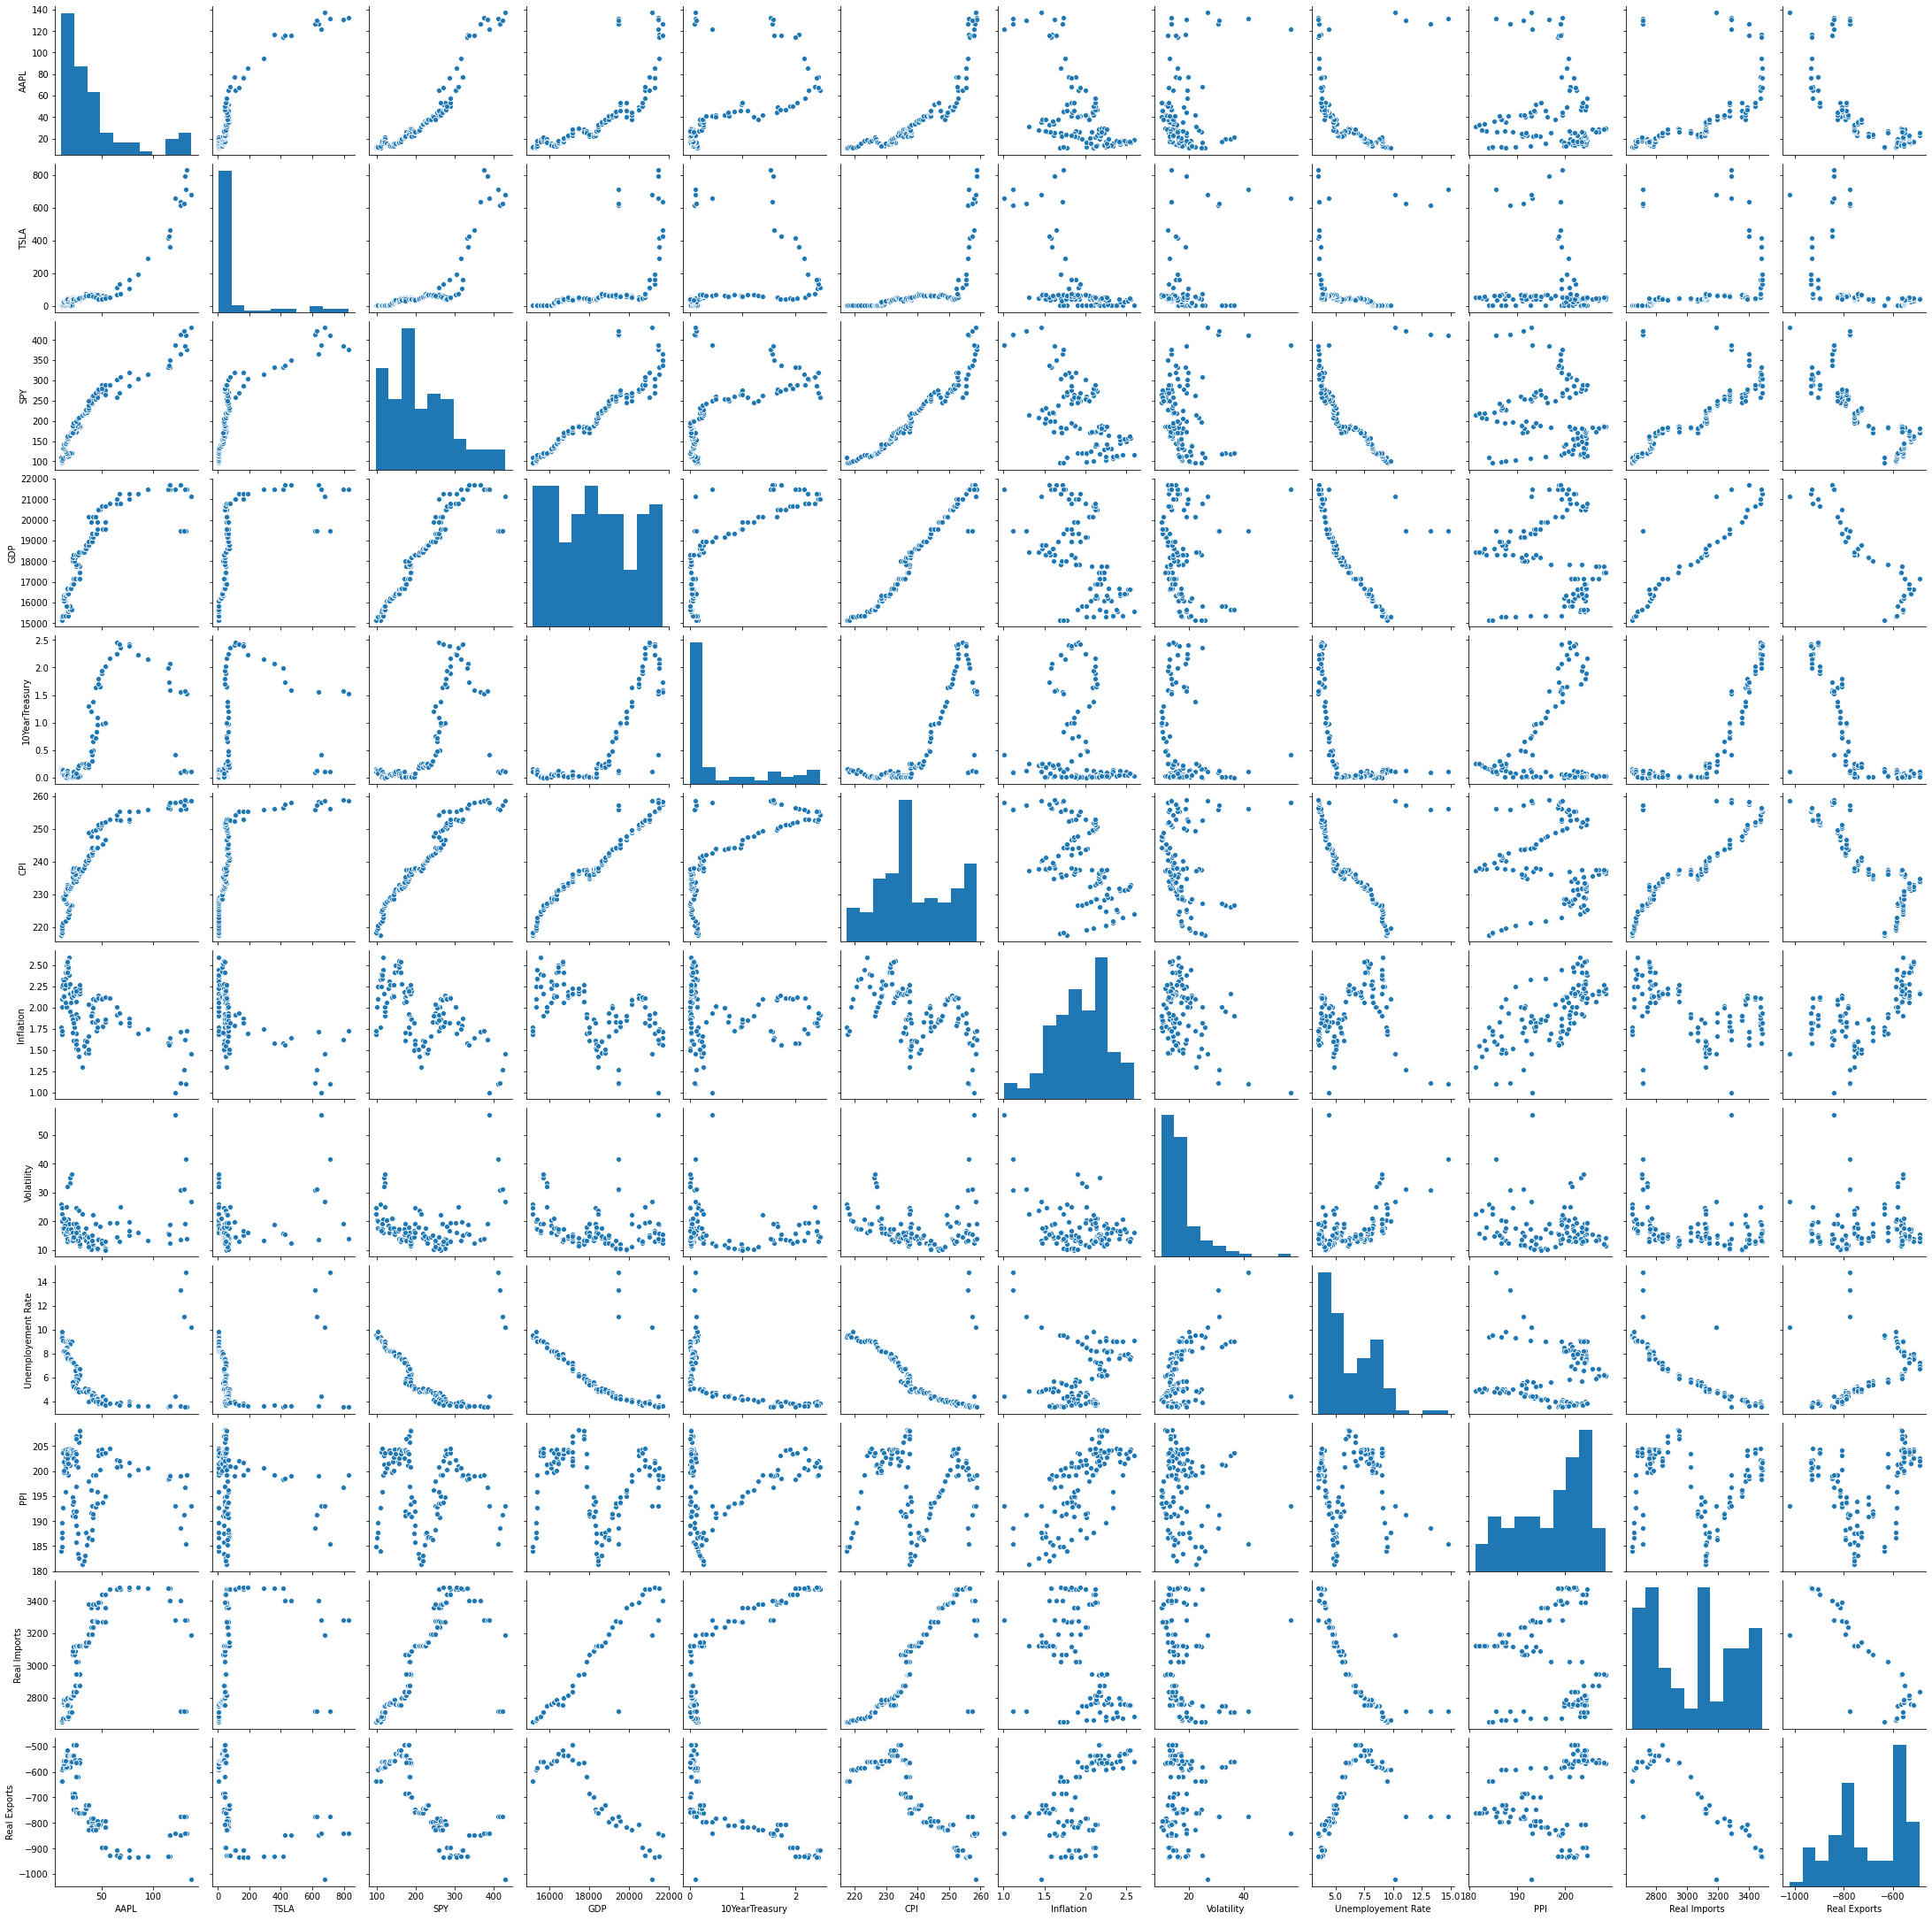

In [711]:
#Scatter Plots
sns.pairplot(dfDC)

Coefficients: 
 [-0.27066337  2.0350324   0.05294176 -0.09449032]
YIntercept: 
 -481.4953280126822


Text(0, 0.5, 'Predicted Y')

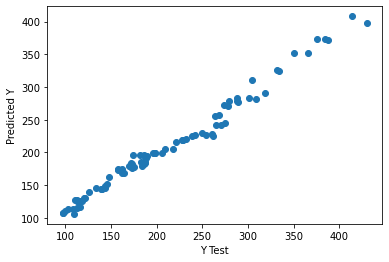

In [710]:
#Linear Model
#'Inflation','CPI','Personal Consumption','10YearTreasury','Unemployement Rate','Real Imports','Real Exports'
y = dfDC['SPY']
X= dfDC[['Real Imports','CPI','GDP','Real Exports']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=97)
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)
print('YIntercept: \n', lm.intercept_)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

MAE: 10.46585037301592
MSE: 175.85701639776696
RMSE: 13.261109169212316


,Real Imports,CPI,GDP,Real Exports,0
Coeffecient,-0.270663,2.035032,0.052942,-0.09449,-481.495328


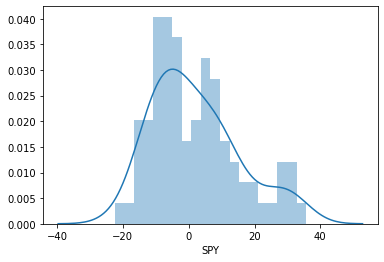

In [667]:
#Error Functions and Histogram
sns.distplot((y_test-predictions),bins=20);
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
coeffecients = pd.DataFrame(lm.coef_,X.columns).append([lm.intercept_])
coeffecients.columns = ['Coeffecient']
coeffecients = coeffecients.transpose()
coeffecients

In [668]:
#Export all data to excel
dfDC.to_excel(excelOutputFolder+"Model Output Data.xlsx")
coeffecients.to_excel(excelOutputFolder+"Coeffecients.xlsx")
corrgrid.to_excel(excelOutputFolder+"CorreltationGrid.xlsx")
dfDCb.to_excel(excelOutputFolder+"Projection Output Data.xlsx")